<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class5/program03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGD와 Adam 성능 그래프 비교

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

## 1.데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
# 1차원 구조로 변환
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# [0, 1]로 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
# 원핫 코드로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## 2.SGD
- 모델 선택

In [3]:
mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,))) # 은닉층 노드 개수 512, 활성 함수 tanh
mlp_sgd.add(Dense(units=10, activation='softmax')) # 출력층 노드 개수 10, 활성 함수 softmax

- 학습 및 예측

In [4]:
mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
hist_sgd = mlp_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('SGD 정확률 =', mlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50
469/469 - 5s - loss: 0.0881 - accuracy: 0.1817 - val_loss: 0.0849 - val_accuracy: 0.2991 - 5s/epoch - 11ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0815 - accuracy: 0.3926 - val_loss: 0.0774 - val_accuracy: 0.4859 - 3s/epoch - 7ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0737 - accuracy: 0.5422 - val_loss: 0.0694 - val_accuracy: 0.5971 - 2s/epoch - 5ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0660 - accuracy: 0.6252 - val_loss: 0.0618 - val_accuracy: 0.6561 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 1s - loss: 0.0591 - accuracy: 0.6661 - val_loss: 0.0555 - val_accuracy: 0.6930 - 1s/epoch - 3ms/step
Epoch 6/50
469/469 - 1s - loss: 0.0536 - accuracy: 0.6959 - val_loss: 0.0505 - val_accuracy: 0.7221 - 1s/epoch - 3ms/step
Epoch 7/50
469/469 - 1s - loss: 0.0492 - accuracy: 0.7204 - val_loss: 0.0464 - val_accuracy: 0.7410 - 1s/epoch - 3ms/step
Epoch 8/50
469/469 - 1s - loss: 0.0456 - accuracy: 0.7405 - val_loss: 0.0431 - val_accuracy: 0.7615 - 1s/epoch - 3ms/step
Epoch 9/50
469/469 - 2s

## 3.Adam
- 모델 선택

In [5]:
mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,))) # 은닉층 노드 개수 512, 활성 함수 tanh
mlp_adam.add(Dense(units=10, activation='softmax')) # 출력층 노드 개수 10, 활성 함수 softmax

- 학습 및 예측

In [6]:
mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_adam = mlp_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('Adam 정확률 =', mlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50
469/469 - 2s - loss: 0.0146 - accuracy: 0.9026 - val_loss: 0.0101 - val_accuracy: 0.9341 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0088 - accuracy: 0.9439 - val_loss: 0.0083 - val_accuracy: 0.9449 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0065 - accuracy: 0.9591 - val_loss: 0.0060 - val_accuracy: 0.9618 - 2s/epoch - 3ms/step
Epoch 4/50
469/469 - 1s - loss: 0.0050 - accuracy: 0.9688 - val_loss: 0.0054 - val_accuracy: 0.9656 - 1s/epoch - 3ms/step
Epoch 5/50
469/469 - 1s - loss: 0.0041 - accuracy: 0.9755 - val_loss: 0.0045 - val_accuracy: 0.9713 - 1s/epoch - 3ms/step
Epoch 6/50
469/469 - 1s - loss: 0.0034 - accuracy: 0.9792 - val_loss: 0.0043 - val_accuracy: 0.9719 - 1s/epoch - 3ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0028 - accuracy: 0.9831 - val_loss: 0.0039 - val_accuracy: 0.9744 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 1s - loss: 0.0024 - accuracy: 0.9861 - val_loss: 0.0036 - val_accuracy: 0.9764 - 1s/epoch - 3ms/step
Epoch 9/50
469/469 - 1s 

## 4.성능 시각화

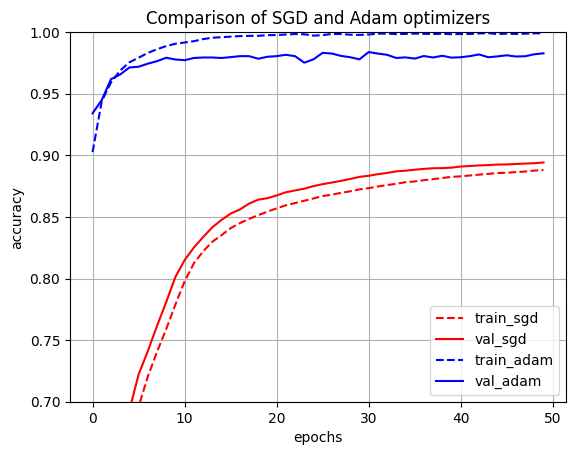

In [7]:
plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()